In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from functions_SAXS import *

In [15]:
# Usage
#filename = '06262_0_vd_00003-00004.edf'
filename = '06262_0_vd_00035-00036.edf'
image = read_esrf_edf_image(filename)
Q, angle, _, _ = load_Qmaps("qmap_output.npz")

In [16]:
mask, list_q, list_theta, mesh_q, mesh_theta, bin_lookup, qmin, qmax = load_qtheta_mask("mask.npz")
mask = remove_bad_pixels_from_mask(mask, image, threshold=1e6)

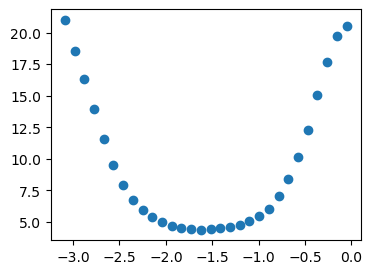

In [17]:
I = calculate_average_intensity_within_mask(image, mask, mesh_q, mesh_theta)
plt.figure(figsize = (4,3))
plt.scatter(mesh_theta, I)

In [18]:
theta_max, I_max = fit_parabola_peak(mesh_theta.flatten(), I.flatten())
print(f"Maximum intensity: {I_max:.2f} at θ = {np.degrees(theta_max):.2f}°")

Maximum intensity: 20.84 at θ = -1.15°


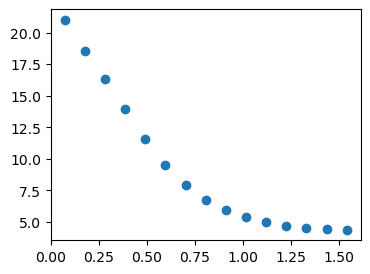

In [20]:
kai, I_kai = shift_and_filter_theta(mesh_theta.flatten(), I.flatten(), theta_max)
plt.figure(figsize = (4,3))
plt.scatter(kai, I_kai)

In [21]:
I_kai

array([21.02885666, 18.55900312, 16.31183766, 13.92969678, 11.53648257,
        9.5016994 ,  7.90334666,  6.72189057,  5.94209548,  5.36169739,
        4.98420858,  4.66856644,  4.52343674,  4.39800466,  4.37080091])

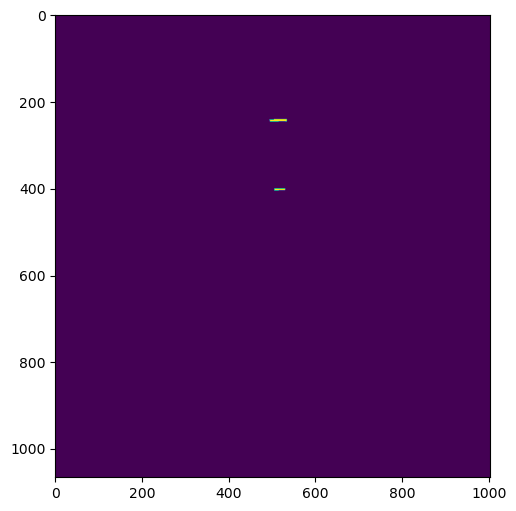

In [22]:
baseline = compute_baseline_intensity(Q, angle, image, theta_max, qmin, qmax, pixels=5, angle_width_deg=2.5)
I_kai_offset = I_kai - baseline

Best-fit parameters (1D array): [   1.16358825   13.40709496  -99.54949496  429.26416314 -626.94941288
  344.04927632]
order parameters: (0.5828952531405152, 0.3239949617898876)


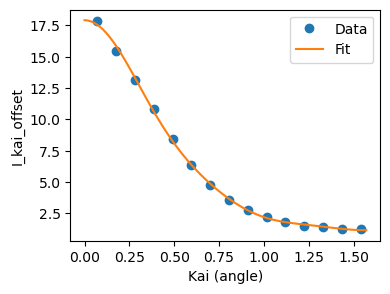

In [23]:
# Replace with your actual data

# Fit the data
initial_guess = np.ones(6)
params_opt, _ = curve_fit(Kratky_function, kai, I_kai_offset, p0=initial_guess)

# Store as 1D array
params = np.array(params_opt)

angle = np.linspace(0, np.pi/2, 100)
# Evaluate the fitted curve
I_fit = Kratky_function(angle, *params)

# Output parameters
print("Best-fit parameters (1D array):", params)
print("order parameters:", order_parameters(params))
# Optional plot
plt.figure(figsize = (4,3))
plt.plot(kai, I_kai_offset, 'o', label='Data')
plt.plot(angle, I_fit, '-', label='Fit')
plt.xlabel("Kai (angle)")
plt.ylabel("I_kai_offset")
plt.legend()
plt.show()

(0.3008499848244989, 0.11695010949313156)